In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns
import math
import datetime


In [3]:
def iterate_and_apply(dataframe, function, necesary_columns):
    perform = True
    step = 100000
    start = 0
    to = step
    
    while perform:
        new_columns = dataframe[start:to][necesary_columns].apply(function, axis=1)
        if len(new_columns) == 0:
            perform = False
        else:
            dataframe.update(new_columns)
        new_columns = None
        start += step
        to += step
    
    return dataframe


In [4]:
data = pd.read_csv('G:\Studies\Big Data Systems & Analytics\Project\Data\FOIL2013\FOIL2013\\trip_data_1\\trip_data_1.csv', skipinitialspace=True)


In [29]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2013000001,2013000001,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:28:00,1,1680,3.94,-73.990784,40.760880,-73.954185,40.778847
1,2013000002,2013000002,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:06:00,5,360,0.98,-73.978325,40.778091,-73.981834,40.768639
2,2013000003,2013000003,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:10:00,1,600,2.77,-73.989616,40.729988,-74.013779,40.705036
3,2013000004,2013000004,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:08:00,2,480,1.68,-73.981575,40.767632,-73.977737,40.757927
4,2013000005,2013000005,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:16:00,4,960,4.05,-74.000526,40.737343,-73.977226,40.783607


In [5]:
data_fare = pd.read_csv('G:\Studies\Big Data Systems & Analytics\Project\Data\FOIL2013\FOIL2013\\trip_fare_1\\trip_fare_1.csv',skipinitialspace = True )

In [17]:
data_fare.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,2013000001,2013000001,VTS,2013-01-01 00:00:00,CSH,20.5,0.5,0.5,0.00,0,21.50
1,2013000002,2013000002,VTS,2013-01-01 00:00:00,CSH,6.0,0.5,0.5,0.00,0,7.00
2,2013000003,2013000003,VTS,2013-01-01 00:00:00,CRD,10.5,0.5,0.5,2.20,0,13.70
3,2013000004,2013000004,VTS,2013-01-01 00:00:00,CRD,8.0,0.5,0.5,1.70,0,10.70
4,2013000005,2013000005,VTS,2013-01-01 00:00:00,CRD,14.5,0.5,0.5,4.65,0,20.15


(0, 10)

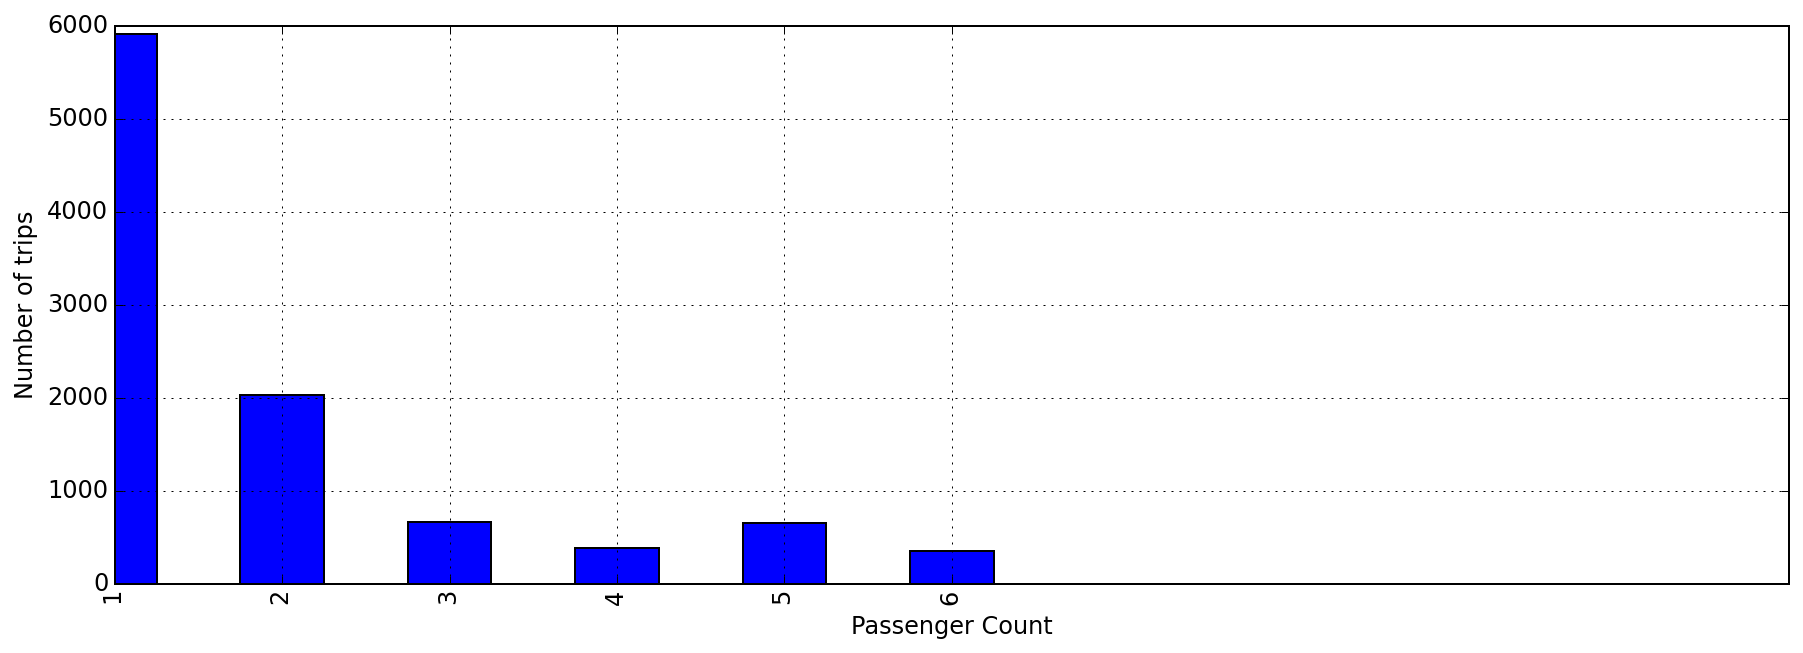

In [13]:
ax = data.groupby(['passenger_count']).size().plot(kind='bar', figsize=(15, 5))
ax.set_xlabel('Passenger Count', fontsize=12)
ax.set_ylabel('Number of trips', fontsize=12)
ax.tick_params(labelsize=12)
ax.set_xlim([0, 10])

In [14]:
data['dist'] = data['trip_distance'].map(lambda x: math.ceil(x))

In [ ]:
ax = data.groupby(['dist']).size().plot(kind='bar', figsize=(15, 5))
ax.set_xlabel('Distance', fontsize=12)
ax.set_ylabel('Number of trips', fontsize=12)
ax.tick_params(labelsize=12)
ax.set_xlim([0, 30])

In [47]:
# (data['trip_time_in_secs']).quantile(0.99)

In [45]:
data['time_distribution'] = data['trip_time_in_secs'].map(lambda x: math.ceil(x * 1.0 /  (100.00))*100)

(0, 25)

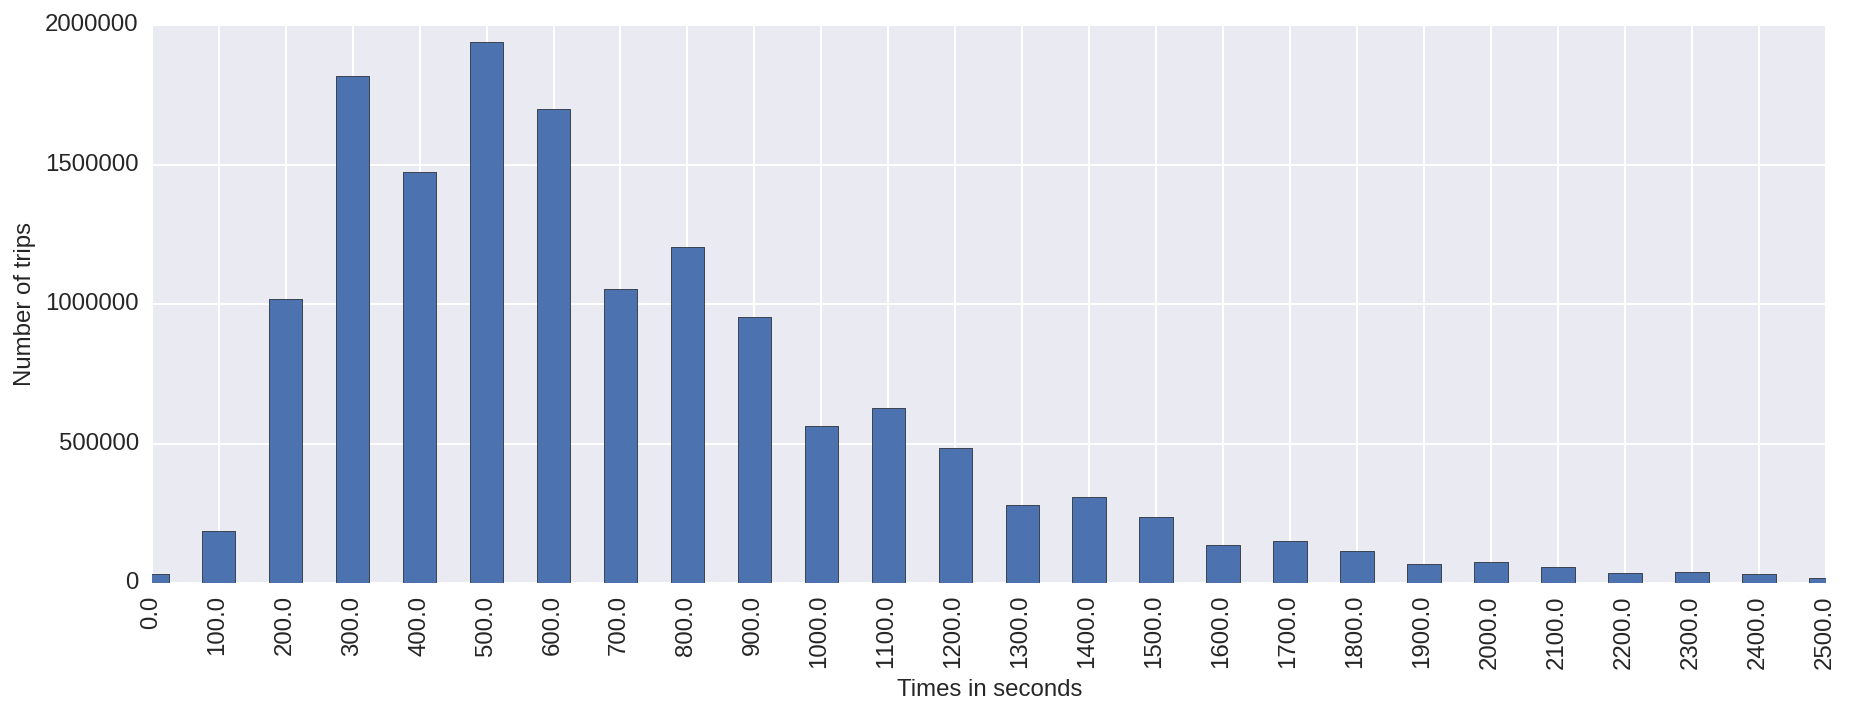

In [54]:
ax = data.groupby(['time_distribution']).size().plot(kind='bar', figsize=(15, 5))
ax.set_xlabel('Times in seconds', fontsize=12)
ax.set_ylabel('Number of trips', fontsize=12)
ax.tick_params(labelsize=12)
ax.set_xlim([0, 25])

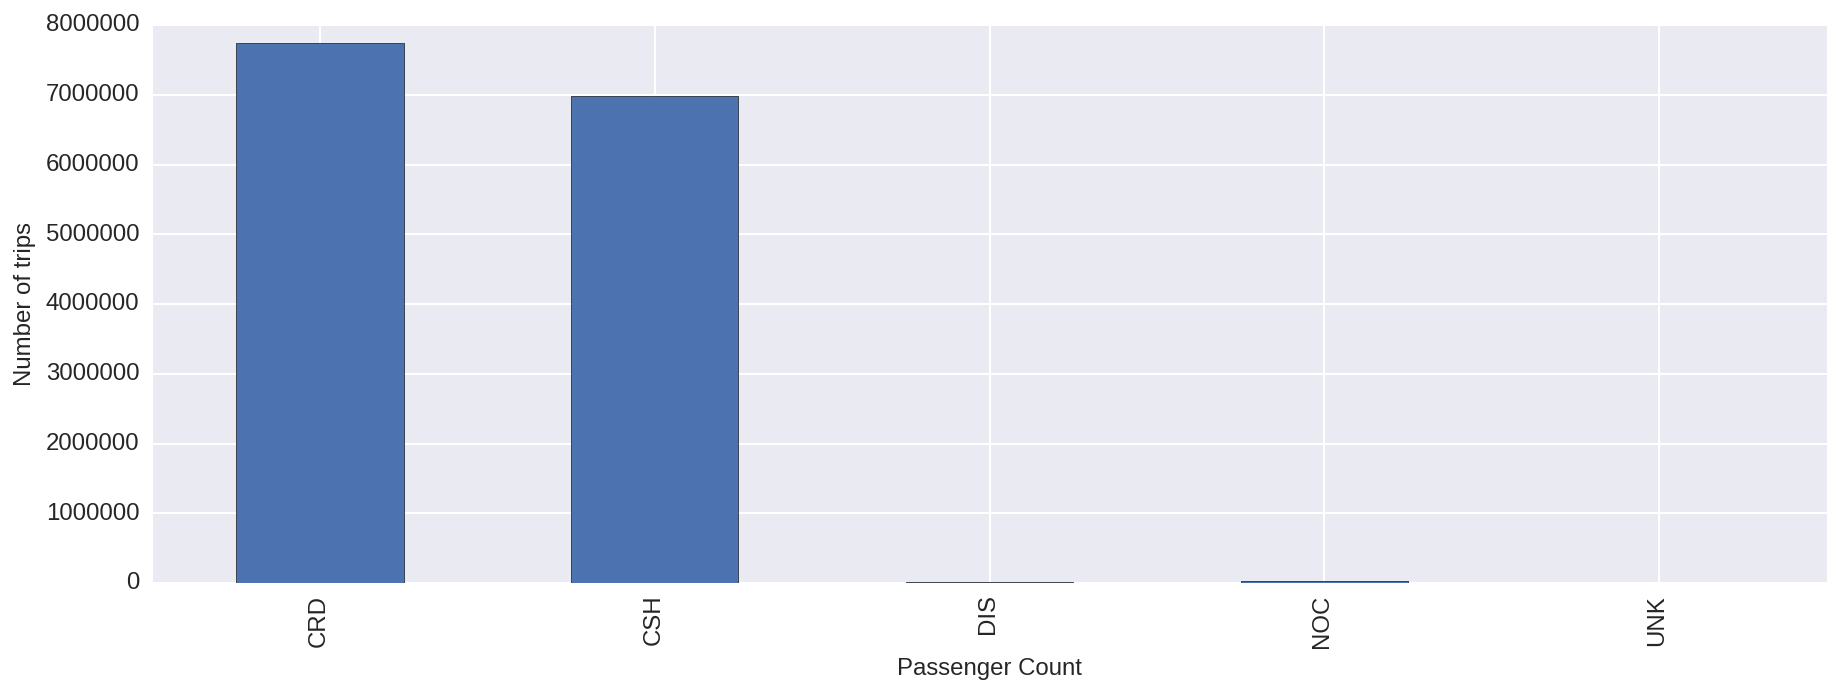

In [53]:
ax = data_fare.groupby(['payment_type']).size().plot(kind='bar', figsize=(15, 5))
ax.set_xlabel('Passenger Count', fontsize=12)
ax.set_ylabel('Number of trips', fontsize=12)
ax.tick_params(labelsize=12)
#ax.set_xlim([0, 10])

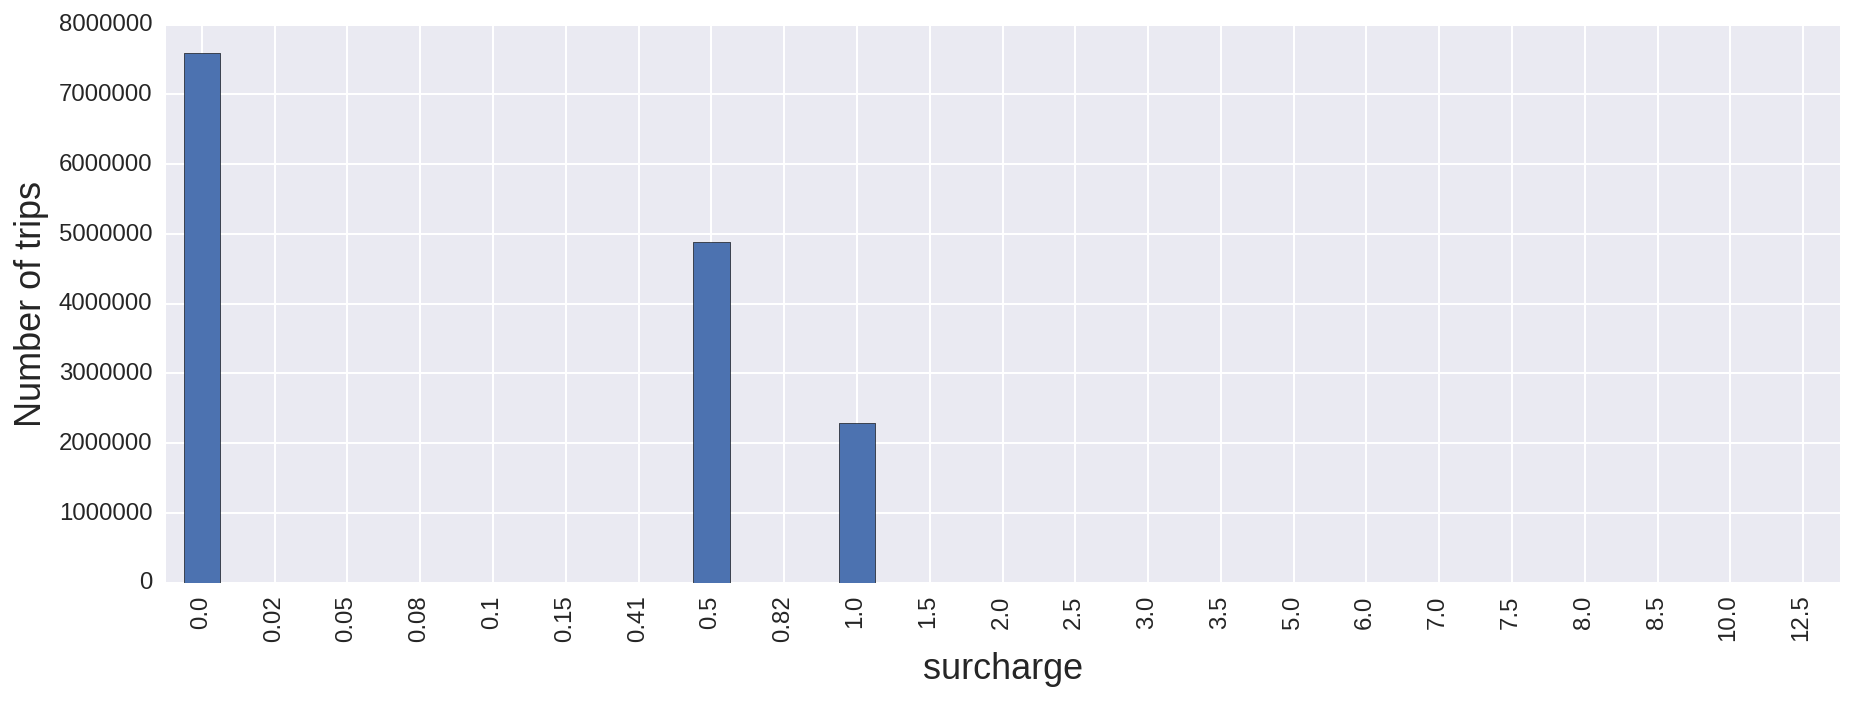

In [52]:
ax = data_fare.groupby(['surcharge']).size().plot(kind='bar', figsize=(15, 5))
ax.set_xlabel('surcharge', fontsize=18)
ax.set_ylabel('Number of trips', fontsize=18)
ax.tick_params(labelsize=12)

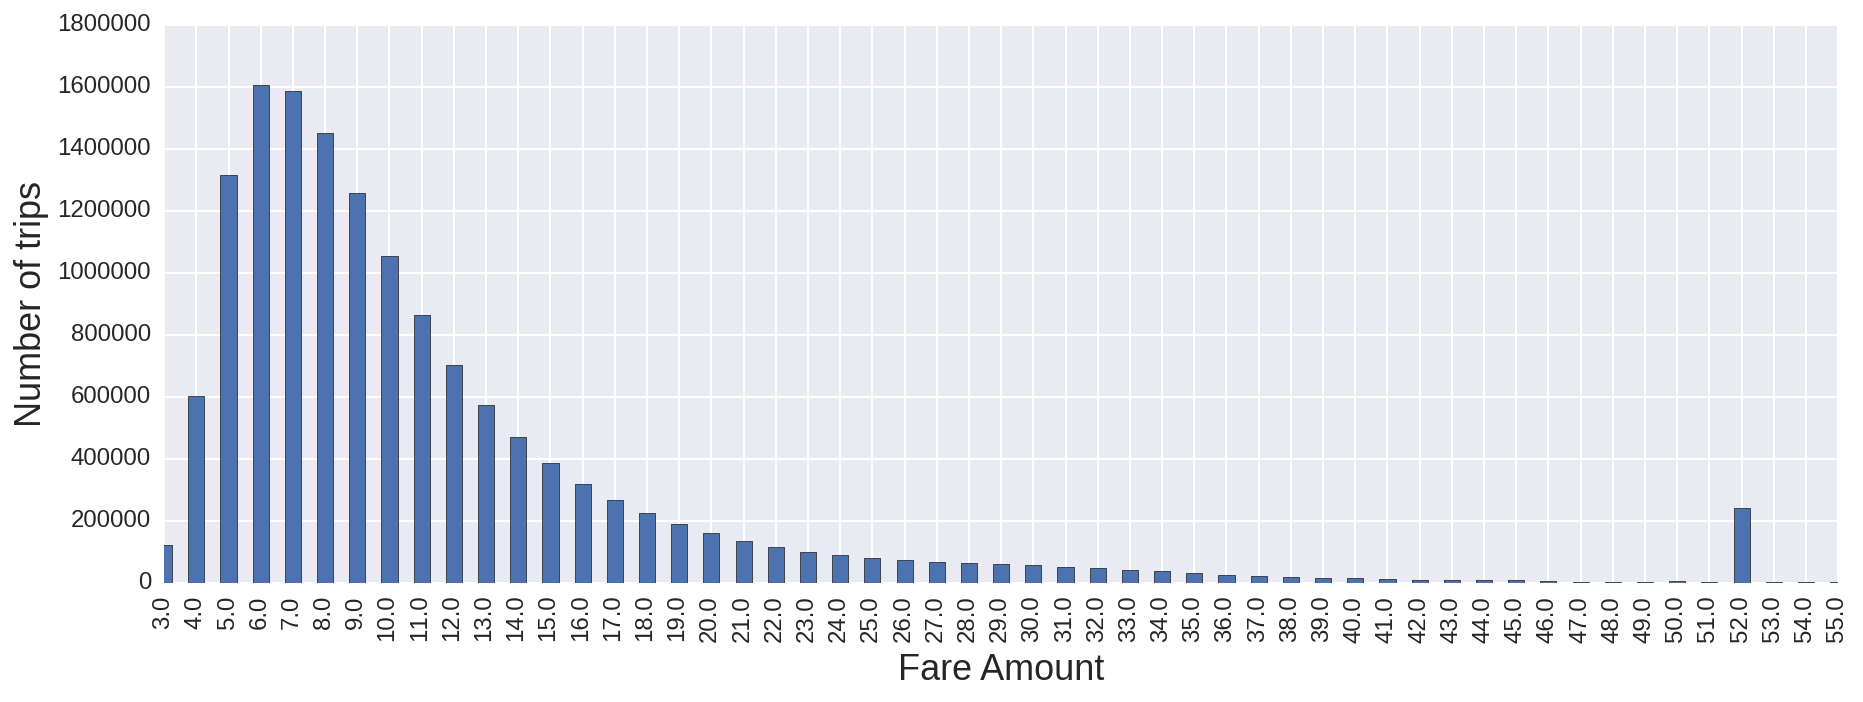

In [66]:
data_fare['fare_round'] = data_fare['fare_amount'].map(lambda x : math.ceil(x))
ax = data_fare.groupby(['fare_round']).size().plot(kind='bar', figsize=(15, 5))
ax.set_xlabel('Fare Amount', fontsize=18)
ax.set_ylabel('Number of trips', fontsize=18)
ax.set_xlim([0, 52])
ax.tick_params(labelsize=12)

In [68]:
data.shape

(14776615, 16)

In [69]:
data_fare.shape

(14776615, 12)

32224

In [ ]:
result = pd.concat([data, data_fare], axis=1)

In [6]:
datetime_necesary_columns = ['pickup_datetime']
datetime_column_names = ['pickup_month', 'pickup_weekday', 'pickup_day', 'pickup_time_in_mins', 'pickup_hours']

# It says if a day is a holiday in NYC.
#def is_in_annual_holidays(the_day):
    #return annual_holidays[(annual_holidays.Month == the_day.month) & (annual_holidays.Day == the_day.day)].shape[0]

# It calculates data related with 'pickup_datetime'.
def calculate_datetime_extra(row):
    dt = datetime.datetime.strptime(row.pickup_datetime, '%Y-%m-%d %H:%M:%S')
    pickup_month = dt.month
    pickup_weekday = dt.weekday()
    pickup_day = dt.day
    pickup_hours = dt.hour
    pickup_time_in_mins = dt.minute
    #pickup_non_working_today = int((pickup_weekday == 5) or (pickup_weekday == 6) or is_in_annual_holidays(dt))
    #pickup_non_working_tomorrow = int((pickup_weekday == 4) or (pickup_weekday == 5) or
                                      #is_in_annual_holidays(dt + datetime.timedelta(days=1)))
    
    return pd.Series({
        datetime_column_names[0]: pickup_month,
        datetime_column_names[1]: pickup_weekday,
        datetime_column_names[2]: pickup_day,
        datetime_column_names[3]: pickup_time_in_mins,
        datetime_column_names[4]: pickup_hours,

    })

def iterate_and_apply(dataframe, function, necesary_columns):
    perform = True
    step = len(dataframe.index)
    start = 0
    to = step
    
    while perform:
        new_columns = dataframe[start:to][necesary_columns].apply(function, axis=1)
        if len(new_columns) == 0:
            perform = False
        else:
            dataframe.update(new_columns)
        new_columns = None
        start += step
        to += step
    
    return dataframe


In [ ]:
for column in datetime_column_names:
    data[column] = np.nan

f_df = iterate_and_apply(data, calculate_datetime_extra, datetime_necesary_columns)

f_df.shape

In [33]:
f_df

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_weekday,pickup_day,pickup_time_in_mins,pickup_hours
0,2013000001,2013000001,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:28:00,1,1680,3.94,-73.990784,40.760880,-73.954185,40.778847,1,1,1,0,0
1,2013000002,2013000002,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:06:00,5,360,0.98,-73.978325,40.778091,-73.981834,40.768639,1,1,1,0,0
2,2013000003,2013000003,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:10:00,1,600,2.77,-73.989616,40.729988,-74.013779,40.705036,1,1,1,0,0
3,2013000004,2013000004,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:08:00,2,480,1.68,-73.981575,40.767632,-73.977737,40.757927,1,1,1,0,0
4,2013000005,2013000005,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:16:00,4,960,4.05,-74.000526,40.737343,-73.977226,40.783607,1,1,1,0,0
5,2013000006,2013000006,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:17:00,6,1020,9.77,-73.866135,40.771091,-73.961334,40.764912,1,1,1,0,0
6,2013000007,2013000007,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:11:00,6,660,1.78,-74.006927,40.740765,-73.982994,40.739616,1,1,1,0,0
7,2013000008,2013000008,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832,1,1,1,0,0
8,2013000009,2013000009,CMT,1,N,2013-01-01 00:00:00,2013-01-01 00:02:44,1,163,0.50,-73.999878,40.743343,-74.003708,40.748280,1,1,1,0,0
9,2013000010,2013000010,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:19:00,3,1140,2.81,-73.989845,40.758041,-73.972008,40.757069,1,1,1,0,0


In [ ]:
bx = f_df.groupby(['pickup_hours']).size().plot(kind='bar', figsize=(15, 5))
bx.set_xlabel('Hours', fontsize=18)
bx.set_ylabel('Number of trips', fontsize=18)
bx.tick_params(labelsize=12)